# Phase 1: Data Preprocessing and Feature Engineering


## Data Integration


In [3]:
##################### Converting all XLSX Files to Json for verification ########################


from datetime import datetime
import pandas as pd
import json
from docx import Document

file_paths = [f'{i}.xlsx' for i in range(1, 14)]


all_records = []


for file_path in file_paths:
   
    year = 2023 if int(file_path.split('.')[0]) <= 6 else 2024

    
    excel_data = pd.ExcelFile(file_path)

  
    data = excel_data.parse('Sheet1')

    
    time_data = data['Time'][0]  
    time_parts = time_data.split()  

    month = time_parts[0]
    days = time_parts[1:]

    
    columns_to_split = ['Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)', 
                        'Wind Speed (mph)', 'Pressure (in)']

    records = []

    for i, day in enumerate(days):
        record = {'Year': year, 'Month': month, 'Day': int(day)}  

        for col in columns_to_split:
            stats_data = data[col][0].split()  
            labels = stats_data[:3]  
            values = stats_data[3 + (3*i)::1] 

            record[col] = dict(zip(labels, values))

        records.append(record)
    
   
    all_records.extend(records)


json_output = json.dumps(all_records, indent=4)


print(json_output)


[
    {
        "Year": 2023,
        "Month": "Jul",
        "Day": 1,
        "Temperature (\u00b0F)": {
            "Max": "97",
            "Avg": "88.8",
            "Min": "81"
        },
        "Dew Point (\u00b0F)": {
            "Max": "77",
            "Avg": "74.5",
            "Min": "72"
        },
        "Humidity (%)": {
            "Max": "74",
            "Avg": "63.4",
            "Min": "47"
        },
        "Wind Speed (mph)": {
            "Max": "14",
            "Avg": "8.9",
            "Min": "5"
        },
        "Pressure (in)": {
            "Max": "28.8",
            "Avg": "28.8",
            "Min": "28.7"
        }
    },
    {
        "Year": 2023,
        "Month": "Jul",
        "Day": 2,
        "Temperature (\u00b0F)": {
            "Max": "99",
            "Avg": "91.5",
            "Min": "82"
        },
        "Dew Point (\u00b0F)": {
            "Max": "79",
            "Avg": "75.8",
            "Min": "75"
        },
        "Humidity (%)"

In [2]:
######################## Matching and Merging All files ####################$####




for d in range(39,73):

    word_file_path =  f'{d}.docx'

    doc = Document(word_file_path)

    json_text = "\n".join([paragraph.text for paragraph in doc.paragraphs])

    try:
        json_data = json.loads(json_text)
        print("JSON Data Loaded Successfully!")
    except json.JSONDecodeError as e:
        print("Error parsing JSON:", e)


    flights_data = json_data




    excel_file_paths = [f'{i}.xlsx' for i in range(1, 14)]  # This will generate ['1.xlsx', '2.xlsx', ..., '13.xlsx']

   
    columns_to_add = ['Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)', 
                      'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)']

    
    def load_excel_data(file_path):
        excel_data = pd.ExcelFile(file_path)
        data = excel_data.parse('Sheet1')
        return data

   
    def preprocess_time_column(data, year):
        time_data = data['Time'][0]  
        time_parts = time_data.split()  

        month = time_parts[0]
        days = time_parts[1:]  

       
        time_dates = []
        for day in days:
            try:
               
                date_str = f"{month} {day}"
                date_obj = datetime.strptime(date_str, "%b %d").date().replace(year=year)  # Use dynamic year
                time_dates.append(date_obj)
            except ValueError:
                
                print(f"Invalid date: {month} {day}. Skipping.")

        return time_dates, columns_to_add, data

    
    all_flights_data = []  



    for i, excel_file_path in enumerate(excel_file_paths):
        print(f"Processing file: {excel_file_path}")

       
        year = 2023 if i < 6 else 2024

      
        data = load_excel_data(excel_file_path)

        
        time_dates, columns_to_add, data = preprocess_time_column(data, year)

       
        merged_flights_data = []

      
        for flight in flights_data:
            if "departure" in flight and "scheduledTime" in flight["departure"]:
                
                flight_date_str = flight["departure"]["scheduledTime"][:10]  # Get date part
                flight_date = datetime.strptime(flight_date_str, "%Y-%m-%d").date()

                
                if flight_date in time_dates:
                    print(f"Match found for scheduledTime: {flight_date}")

                    
                    day_index = time_dates.index(flight_date)  
                    for col in columns_to_add:
                        
                        stats_data = data[col][0].split()  
                        labels = stats_data[:3] 
                        values = stats_data[3 + (3*day_index)::1]  
                        flight[col] = dict(zip(labels, values)) 

                   
                    merged_flights_data.append(flight)

        
        all_flights_data.extend(merged_flights_data)

    
    updated_json_file_path = f'{d}updated_flights.json'
    with open(updated_json_file_path, 'w') as json_file:
        json.dump(all_flights_data, json_file, indent=4)

    pretty_json = json.dumps(updated_json_file_path, indent=4)
    print(pretty_json)

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Match found for scheduledTime: 2024-02-27
Match found for scheduledTime: 2024-02-22
Match found for scheduledTime: 2024-02-24
Match found for scheduledTime: 2024-02-27
Match found for scheduledTime: 2024-02-27
Match found for scheduledTime: 2024-02-23
Match found for scheduledTime: 2024-02-17
Match found for scheduledTime: 2024-02-16
Match found for scheduledTime: 2024-02-16
Match found for scheduledTime: 2024-02-19
Match found for scheduledTime: 2024-02-22
Match found for scheduledTime: 2024-02-16
Match found for scheduledTime: 2024-02-28
Match found for scheduledTime: 2024-02-20
Match found for scheduledTime: 2024-02-24
Match found for scheduledTime: 2024-02-28
Match found for scheduledTime: 2024-02-23
Match found for scheduledTime: 

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Match found for scheduledTime: 2024-03-05
Match found for scheduledTime: 2024-03-03
Match found for scheduledTime: 2024-03-13
Match found for scheduledTime: 2024-03-14
Match found for scheduledTime: 2024-03-07
Match found for scheduledTime: 2024-03-14
Match found for scheduledTime: 2024-03-11
Match found for scheduledTime: 2024-03-04
Match found for scheduledTime: 2024-03-11
Match found for scheduledTime: 2024-03-03
Match found for scheduledTime: 2024-03-06
Match found for scheduledTime: 2024-03-12
Match found for scheduledTime: 2024-03-05
Match found for scheduledTime: 2024-03-05
Match found for scheduledTime: 2024-03-03
Match found for scheduledTime: 2024-03-12
Match found for scheduledTime: 2024-03-08
Match f

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Match found for scheduledTime: 2024-03-17
Match found for scheduledTime: 2024-03-23
Match found for scheduledTime: 2024-03-28
Match found for scheduledTime: 2024-03-28
Match found for scheduledTime: 2024-03-19
Match found for scheduledTime: 2024-03-22
Match found for scheduledTime: 2024-03-26
Match found for scheduledTime: 2024-03-31
Match found for scheduledTime: 2024-03-25
Match found for scheduledTime: 2024-03-26
Match found for scheduledTime: 2024-03-30
Match found for scheduledTime: 2024-03-23
Match found for scheduledTime: 2024-03-19
Match found for scheduledTime: 2024-03-28
Match found for scheduledTime: 2024-03-18
Match found for scheduledTime: 2024-03-28
Match found for scheduledTime: 2024-03-20
Match f

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Match found for scheduledTime: 2024-04-02
Match found for scheduledTime: 2024-04-09
Match found for scheduledTime: 2024-04-04
Match found for scheduledTime: 2024-04-04
Match found for scheduledTime: 2024-04-13
Match found for scheduledTime: 2024-04-04
Match found for scheduledTime: 2024-04-10
Match found for scheduledTime: 2024-04-05
Match found for scheduledTime: 2024-04-11
Match found for scheduledTime: 2024-04-12
Match found for scheduledTime: 2024-04-10
Match found for scheduledTime: 2024-04-12
Match found for scheduledTime: 2024-04-12
Match found for scheduledTime: 2024-04-10
Match found for scheduledTime: 2024-04-02
Match found for scheduledTime: 2024-04-03
Match found for schedule

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Match found for scheduledTime: 2024-04-30
Match found for scheduledTime: 2024-04-25
Match found for scheduledTime: 2024-04-22
Match found for scheduledTime: 2024-04-29
Match found for scheduledTime: 2024-04-16
Match found for scheduledTime: 2024-04-18
Match found for scheduledTime: 2024-04-20
Match found for scheduledTime: 2024-04-20
Match found for scheduledTime: 2024-04-17
Match found for scheduledTime: 2024-04-25
Match found for scheduledTime: 2024-04-27
Match found for scheduledTime: 2024-04-29
Match found for scheduledTime: 2024-04-23
Match found for scheduledTime: 2024-04-29
Match found for scheduledTime: 2024-04-19
Match found for scheduledTime: 2024-04-21
Match found for schedule

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Match found for scheduledTime: 2024-05-03
Match found for scheduledTime: 2024-05-04
Match found for scheduledTime: 2024-05-05
Match found for scheduledTime: 2024-05-04
Match found for scheduledTime: 2024-05-07
Match found for scheduledTime: 2024-05-14
Match found for scheduledTime: 2024-05-15
Match found for scheduledTime: 2024-05-07
Match found for scheduledTime: 2024-05-12
Match found for scheduledTime: 2024-05-10
Match found for scheduledTime: 2024-05-10
Match found for scheduledTime: 2024-05-01
Match found for scheduledTime: 2024-05-02
Match found for scheduledTime: 2024-05-01
Match found for scheduledTime: 2024-05-02
Match found for scheduledTime: 2024-05-08

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Match found for scheduledTime: 2024-05-18
Match found for scheduledTime: 2024-05-25
Match found for scheduledTime: 2024-05-20
Match found for scheduledTime: 2024-05-18
Match found for scheduledTime: 2024-05-27
Match found for scheduledTime: 2024-05-17
Match found for scheduledTime: 2024-05-23
Match found for scheduledTime: 2024-05-23
Match found for scheduledTime: 2024-05-17
Match found for scheduledTime: 2024-05-23
Match found for scheduledTime: 2024-05-16
Match found for scheduledTime: 2024-05-28
Match found for scheduledTime: 2024-05-21
Match found for scheduledTime: 2024-05-26
Match found for scheduledTime: 2024-05-18
Match found for scheduledTime: 2024-05-30

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Processing file: 12.xlsx
Match found for scheduledTime: 2024-06-13
Match found for scheduledTime: 2024-06-12
Match found for scheduledTime: 2024-06-13
Match found for scheduledTime: 2024-06-07
Match found for scheduledTime: 2024-06-06
Match found for scheduledTime: 2024-06-15
Match found for scheduledTime: 2024-06-10
Match found for scheduledTime: 2024-06-13
Match found for scheduledTime: 2024-06-04
Match found for scheduledTime: 2024-06-04
Match found for scheduledTime: 2024-06-02
Match found for scheduledTime: 2024-06-06
Match found for scheduledTime: 2024-06-07
Match found for scheduledTime: 2024-06-02
Match found for scheduledTime: 2024-06-14
Match found for 

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Processing file: 12.xlsx
Match found for scheduledTime: 2024-06-20
Match found for scheduledTime: 2024-06-25
Match found for scheduledTime: 2024-06-22
Match found for scheduledTime: 2024-06-18
Match found for scheduledTime: 2024-06-24
Match found for scheduledTime: 2024-06-25
Match found for scheduledTime: 2024-06-22
Match found for scheduledTime: 2024-06-18
Match found for scheduledTime: 2024-06-19
Match found for scheduledTime: 2024-06-25
Match found for scheduledTime: 2024-06-28
Match found for scheduledTime: 2024-06-29
Match found for scheduledTime: 2024-06-29
Match found for scheduledTime: 2024-06-20
Match found for scheduledTime: 2024-06-30
Match found for 

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Processing file: 12.xlsx
Processing file: 13.xlsx
Match found for scheduledTime: 2024-07-07
Match found for scheduledTime: 2024-07-02
Match found for scheduledTime: 2024-07-08
Match found for scheduledTime: 2024-07-09
Match found for scheduledTime: 2024-07-02
Match found for scheduledTime: 2024-07-05
Match found for scheduledTime: 2024-07-07
Match found for scheduledTime: 2024-07-03
Match found for scheduledTime: 2024-07-01
Match found for scheduledTime: 2024-07-07
Match found for scheduledTime: 2024-07-09
Match found for scheduledTime: 2024-07-06
Match found for scheduledTime: 2024-07-08
Match found for scheduledTime: 2024-07-04
Match found for scheduledTime: 20

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Match found for scheduledTime: 2023-07-27
Match found for scheduledTime: 2023-07-28
Match found for scheduledTime: 2023-07-21
Match found for scheduledTime: 2023-07-15
Match found for scheduledTime: 2023-07-25
Match found for scheduledTime: 2023-07-27
Match found for scheduledTime: 2023-07-20
Match found for scheduledTime: 2023-07-30
Match found for scheduledTime: 2023-07-27
Match found for scheduledTime: 2023-07-30
Match found for scheduledTime: 2023-07-23
Match found for scheduledTime: 2023-07-17
Match found for scheduledTime: 2023-07-14
Match found for scheduledTime: 2023-07-18
Match found for scheduledTime: 2023-07-23
Match found for scheduledTime: 2023-07-27
Match found for scheduledTime: 2023-07-27
Match found for scheduledTime: 2023-07-14
Match found for scheduledTime: 2023-07-14
Match found for scheduledTime: 2023-07-23
Match found for scheduledTime: 2023-07-28
Match found for scheduledTime: 2023-07-31
Match found for sched

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Match found for scheduledTime: 2023-08-07
Match found for scheduledTime: 2023-08-04
Match found for scheduledTime: 2023-08-10
Match found for scheduledTime: 2023-08-15
Match found for scheduledTime: 2023-08-09
Match found for scheduledTime: 2023-08-07
Match found for scheduledTime: 2023-08-04
Match found for scheduledTime: 2023-08-12
Match found for scheduledTime: 2023-08-09
Match found for scheduledTime: 2023-08-04
Match found for scheduledTime: 2023-08-12
Match found for scheduledTime: 2023-08-14
Match found for scheduledTime: 2023-08-14
Match found for scheduledTime: 2023-08-05
Match found for scheduledTime: 2023-08-14
Match found for scheduledTime: 2023-08-13
Match found for scheduledTime: 2023-08-07
Match found for scheduledTime: 2023-08-03
Match found for scheduledTime: 2023-08-10
Match found for scheduledTime: 2023-08-08
Match found for scheduledTime: 2023-08-05
Match found for scheduledTime: 2023-08-

Processing file: 2.xlsx
Match found for scheduledTime: 2023-08-23
Match found for scheduledTime: 2023-08-30
Match found for scheduledTime: 2023-08-24
Match found for scheduledTime: 2023-08-16
Match found for scheduledTime: 2023-08-27
Match found for scheduledTime: 2023-08-27
Match found for scheduledTime: 2023-08-23
Match found for scheduledTime: 2023-08-23
Match found for scheduledTime: 2023-08-24
Match found for scheduledTime: 2023-08-17
Match found for scheduledTime: 2023-08-31
Match found for scheduledTime: 2023-08-31
Match found for scheduledTime: 2023-08-20
Match found for scheduledTime: 2023-08-27
Match found for scheduledTime: 2023-08-26
Match found for scheduledTime: 2023-08-16
Match found for scheduledTime: 2023-08-30
Match found for scheduledTime: 2023-08-24
Match found for scheduledTime: 2023-08-28
Match found for scheduledTime: 2023-08-28
Match found for scheduledTime: 2023-08-25
Match found for scheduledTime: 2023-08-21
Match found for scheduledTime: 2023-08-21
Match foun

Processing file: 2.xlsx
Processing file: 3.xlsx
Match found for scheduledTime: 2023-09-13
Match found for scheduledTime: 2023-09-11
Match found for scheduledTime: 2023-09-12
Match found for scheduledTime: 2023-09-04
Match found for scheduledTime: 2023-09-07
Match found for scheduledTime: 2023-09-02
Match found for scheduledTime: 2023-09-12
Match found for scheduledTime: 2023-09-08
Match found for scheduledTime: 2023-09-13
Match found for scheduledTime: 2023-09-04
Match found for scheduledTime: 2023-09-08
Match found for scheduledTime: 2023-09-04
Match found for scheduledTime: 2023-09-10
Match found for scheduledTime: 2023-09-04
Match found for scheduledTime: 2023-09-08
Match found for scheduledTime: 2023-09-03
Match found for scheduledTime: 2023-09-13
Match found for scheduledTime: 2023-09-03
Match found for scheduledTime: 2023-09-02
Match found for scheduledTime: 2023-09-08
Match found for scheduledTime: 2023-09-10
Match found for scheduledTime: 2023-09-01
Match found for scheduledTim

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Match found for scheduledTime: 2023-09-21
Match found for scheduledTime: 2023-09-20
Match found for scheduledTime: 2023-09-23
Match found for scheduledTime: 2023-09-22
Match found for scheduledTime: 2023-09-28
Match found for scheduledTime: 2023-09-23
Match found for scheduledTime: 2023-09-20
Match found for scheduledTime: 2023-09-16
Match found for scheduledTime: 2023-09-19
Match found for scheduledTime: 2023-09-18
Match found for scheduledTime: 2023-09-20
Match found for scheduledTime: 2023-09-20
Match found for scheduledTime: 2023-09-18
Match found for scheduledTime: 2023-09-30
Match found for scheduledTime: 2023-09-18
Match found for scheduledTime: 2023-09-29
Match found for scheduledTime: 2023-09-24
Match found for scheduledTime: 2023-09-21
Match found for scheduledTime: 2023-09-19
Match found for scheduledTime: 2023-09-23
Match found for scheduledTime: 2023-09-26
Match found for

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Match found for scheduledTime: 2023-10-06
Match found for scheduledTime: 2023-10-08
Match found for scheduledTime: 2023-10-06
Match found for scheduledTime: 2023-10-04
Match found for scheduledTime: 2023-10-12
Match found for scheduledTime: 2023-10-01
Match found for scheduledTime: 2023-10-04
Match found for scheduledTime: 2023-10-13
Match found for scheduledTime: 2023-10-16
Match found for scheduledTime: 2023-10-05
Match found for scheduledTime: 2023-10-05
Match found for scheduledTime: 2023-10-13
Match found for scheduledTime: 2023-10-06
Match found for scheduledTime: 2023-10-08
Match found for scheduledTime: 2023-10-06
Match found for scheduledTime: 2023-10-05
Match found for scheduledTime: 2023-10-12
Match found for scheduledTime: 2023-10-15
Match found for scheduledTime: 2023-10-09
Match found for scheduledTime: 2023-10-13
Match found for scheduledTime: 20

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Match found for scheduledTime: 2023-10-23
Match found for scheduledTime: 2023-10-26
Match found for scheduledTime: 2023-10-17
Match found for scheduledTime: 2023-10-26
Match found for scheduledTime: 2023-10-26
Match found for scheduledTime: 2023-10-31
Match found for scheduledTime: 2023-10-28
Match found for scheduledTime: 2023-10-22
Match found for scheduledTime: 2023-10-31
Match found for scheduledTime: 2023-10-28
Match found for scheduledTime: 2023-10-26
Match found for scheduledTime: 2023-10-23
Match found for scheduledTime: 2023-10-29
Match found for scheduledTime: 2023-10-28
Match found for scheduledTime: 2023-10-18
Match found for scheduledTime: 2023-10-18
Match found for scheduledTime: 2023-10-29
Match found for scheduledTime: 2023-10-25
Match found for scheduledTime: 2023-10-29
Match found for scheduledTime: 2023-10-21
Match found for scheduledTime: 20

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Match found for scheduledTime: 2023-11-08
Match found for scheduledTime: 2023-11-12
Match found for scheduledTime: 2023-11-02
Match found for scheduledTime: 2023-11-07
Match found for scheduledTime: 2023-11-14
Match found for scheduledTime: 2023-11-10
Match found for scheduledTime: 2023-11-07
Match found for scheduledTime: 2023-11-13
Match found for scheduledTime: 2023-11-16
Match found for scheduledTime: 2023-11-04
Match found for scheduledTime: 2023-11-12
Match found for scheduledTime: 2023-11-08
Match found for scheduledTime: 2023-11-02
Match found for scheduledTime: 2023-11-12
Match found for scheduledTime: 2023-11-07
Match found for scheduledTime: 2023-11-15
Match found for scheduledTime: 2023-11-03
Match found for scheduledTime: 2023-11-02
Match found for scheduledTime: 2023-11-15
Match found for scheduledTime: 2023-11-13
Match fou

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Match found for scheduledTime: 2023-11-20
Match found for scheduledTime: 2023-11-25
Match found for scheduledTime: 2023-11-17
Match found for scheduledTime: 2023-11-19
Match found for scheduledTime: 2023-11-24
Match found for scheduledTime: 2023-11-17
Match found for scheduledTime: 2023-11-22
Match found for scheduledTime: 2023-11-23
Match found for scheduledTime: 2023-11-19
Match found for scheduledTime: 2023-11-19
Match found for scheduledTime: 2023-11-27
Match found for scheduledTime: 2023-11-27
Match found for scheduledTime: 2023-11-18
Match found for scheduledTime: 2023-11-26
Match found for scheduledTime: 2023-11-25
Match found for scheduledTime: 2023-11-29
Match found for scheduledTime: 2023-11-24
Match found for scheduledTime: 2023-11-28
Match found for scheduledTime: 2023-11-28
Match found for scheduledTime: 2023-11-29
Match fou

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Match found for scheduledTime: 2023-12-08
Match found for scheduledTime: 2023-12-02
Match found for scheduledTime: 2023-12-09
Match found for scheduledTime: 2023-12-14
Match found for scheduledTime: 2023-12-05
Match found for scheduledTime: 2023-12-02
Match found for scheduledTime: 2023-12-07
Match found for scheduledTime: 2023-12-02
Match found for scheduledTime: 2023-12-01
Match found for scheduledTime: 2023-12-09
Match found for scheduledTime: 2023-12-02
Match found for scheduledTime: 2023-12-06
Match found for scheduledTime: 2023-12-15
Match found for scheduledTime: 2023-12-09
Match found for scheduledTime: 2023-12-04
Match found for scheduledTime: 2023-12-06
Match found for scheduledTime: 2023-12-11
Match found for scheduledTime: 2023-12-06
Match found for scheduledTime: 2023-12-11
Match found for scheduledTi

Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Match found for scheduledTime: 2023-12-17
Match found for scheduledTime: 2023-12-18
Match found for scheduledTime: 2023-12-17
Match found for scheduledTime: 2023-12-29
Match found for scheduledTime: 2023-12-28
Match found for scheduledTime: 2023-12-19
Match found for scheduledTime: 2023-12-20
Match found for scheduledTime: 2023-12-26
Match found for scheduledTime: 2023-12-25
Match found for scheduledTime: 2023-12-30
Match found for scheduledTime: 2023-12-16
Match found for scheduledTime: 2023-12-29
Match found for scheduledTime: 2023-12-18
Match found for scheduledTime: 2023-12-18
Match found for scheduledTime: 2023-12-27
Match found for scheduledTime: 2023-12-17
Match found for scheduledTime: 2023-12-24
Match found for scheduledTime: 2023-12-18
Match found for scheduledTime: 2023-12-20
Match found for scheduledTime: 2023-12-18
Match found for scheduledTime: 2023-12-3

Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Match found for scheduledTime: 2024-01-06
Match found for scheduledTime: 2024-01-08
Match found for scheduledTime: 2024-01-13
Match found for scheduledTime: 2024-01-14
Match found for scheduledTime: 2024-01-01
Match found for scheduledTime: 2024-01-15
Match found for scheduledTime: 2024-01-04
Match found for scheduledTime: 2024-01-10
Match found for scheduledTime: 2024-01-11
Match found for scheduledTime: 2024-01-12
Match found for scheduledTime: 2024-01-09
Match found for scheduledTime: 2024-01-03
Match found for scheduledTime: 2024-01-06
Match found for scheduledTime: 2024-01-03
Match found for scheduledTime: 2024-01-07
Match found for scheduledTime: 2024-01-11
Match found for scheduledTime: 2024-01-16
Match found for scheduledTime: 2024-01-05
Match found for scheduledTime: 2024-01-08
Match found for scheduledTime: 2024-01-10
Match found for 

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Match found for scheduledTime: 2024-01-16
Match found for scheduledTime: 2024-01-29
Match found for scheduledTime: 2024-01-19
Match found for scheduledTime: 2024-01-22
Match found for scheduledTime: 2024-01-25
Match found for scheduledTime: 2024-01-17
Match found for scheduledTime: 2024-01-17
Match found for scheduledTime: 2024-01-27
Match found for scheduledTime: 2024-01-29
Match found for scheduledTime: 2024-01-25
Match found for scheduledTime: 2024-01-23
Match found for scheduledTime: 2024-01-16
Match found for scheduledTime: 2024-01-21
Match found for scheduledTime: 2024-01-27
Match found for scheduledTime: 2024-01-19
Match found for scheduledTime: 2024-01-28
Match found for scheduledTime: 2024-01-16
Match found for scheduledTime: 2024-01-25
Match found for scheduledTime: 2024-01-30
Mat

"61updated_flights.json"
JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Match found for scheduledTime: 2024-02-11
Match found for scheduledTime: 2024-02-10
Match found for scheduledTime: 2024-02-12
Match found for scheduledTime: 2024-02-06
Match found for scheduledTime: 2024-02-13
Match found for scheduledTime: 2024-02-07
Match found for scheduledTime: 2024-02-10
Match found for scheduledTime: 2024-02-12
Match found for scheduledTime: 2024-02-11
Match found for scheduledTime: 2024-02-02
Match found for scheduledTime: 2024-02-07
Match found for scheduledTime: 2024-02-09
Match found for scheduledTime: 2024-02-09
Match found for scheduledTime: 2024-02-03
Match found for scheduledTime: 2024-02-04
Match found for scheduledTime: 2024-02-02
Match found for scheduledTime: 2024-02-04
Match 

"62updated_flights.json"
JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Match found for scheduledTime: 2024-02-27
Match found for scheduledTime: 2024-02-25
Match found for scheduledTime: 2024-02-23
Match found for scheduledTime: 2024-02-21
Match found for scheduledTime: 2024-02-23
Match found for scheduledTime: 2024-02-28
Match found for scheduledTime: 2024-02-19
Match found for scheduledTime: 2024-02-20
Match found for scheduledTime: 2024-02-17
Match found for scheduledTime: 2024-02-21
Match found for scheduledTime: 2024-02-28
Match found for scheduledTime: 2024-02-24
Match found for scheduledTime: 2024-02-16
Match found for scheduledTime: 2024-02-27
Match found for scheduledTime: 2024-02-21
Match found for scheduledTime: 2024-02-23
Match found for scheduledTime: 2024-02-24
Match 

"63updated_flights.json"
JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Match found for scheduledTime: 2024-03-08
Match found for scheduledTime: 2024-03-08
Match found for scheduledTime: 2024-03-01
Match found for scheduledTime: 2024-03-06
Match found for scheduledTime: 2024-03-05
Match found for scheduledTime: 2024-03-11
Match found for scheduledTime: 2024-03-13
Match found for scheduledTime: 2024-03-04
Match found for scheduledTime: 2024-03-13
Match found for scheduledTime: 2024-03-03
Match found for scheduledTime: 2024-03-04
Match found for scheduledTime: 2024-03-10
Match found for scheduledTime: 2024-03-15
Match found for scheduledTime: 2024-03-05
Match found for scheduledTime: 2024-03-03
Match found for scheduledTime: 2024-03-07
Match found for schedule

"64updated_flights.json"
JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Match found for scheduledTime: 2024-03-17
Match found for scheduledTime: 2024-03-27
Match found for scheduledTime: 2024-03-16
Match found for scheduledTime: 2024-03-23
Match found for scheduledTime: 2024-03-25
Match found for scheduledTime: 2024-03-18
Match found for scheduledTime: 2024-03-28
Match found for scheduledTime: 2024-03-20
Match found for scheduledTime: 2024-03-22
Match found for scheduledTime: 2024-03-19
Match found for scheduledTime: 2024-03-17
Match found for scheduledTime: 2024-03-27
Match found for scheduledTime: 2024-03-20
Match found for scheduledTime: 2024-03-27
Match found for scheduledTime: 2024-03-17
Match found for scheduledTime: 2024-03-20
Match found for schedule

Processing file: 12.xlsx
Processing file: 13.xlsx
"65updated_flights.json"
JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Match found for scheduledTime: 2024-04-11
Match found for scheduledTime: 2024-04-11
Match found for scheduledTime: 2024-04-03
Match found for scheduledTime: 2024-04-11
Match found for scheduledTime: 2024-04-04
Match found for scheduledTime: 2024-04-09
Match found for scheduledTime: 2024-04-05
Match found for scheduledTime: 2024-04-09
Match found for scheduledTime: 2024-04-14
Match found for scheduledTime: 2024-04-03
Match found for scheduledTime: 2024-04-14
Match found for scheduledTime: 2024-04-15
Match found for scheduledTime: 2024-04-03
Match found for scheduledTime: 2024-04-10
Match found for scheduledTime: 20

Processing file: 12.xlsx
Processing file: 13.xlsx
"66updated_flights.json"
JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Match found for scheduledTime: 2024-04-16
Match found for scheduledTime: 2024-04-18
Match found for scheduledTime: 2024-04-25
Match found for scheduledTime: 2024-04-24
Match found for scheduledTime: 2024-04-26
Match found for scheduledTime: 2024-04-23
Match found for scheduledTime: 2024-04-20
Match found for scheduledTime: 2024-04-26
Match found for scheduledTime: 2024-04-16
Match found for scheduledTime: 2024-04-16
Match found for scheduledTime: 2024-04-24
Match found for scheduledTime: 2024-04-20
Match found for scheduledTime: 2024-04-26
Match found for scheduledTime: 2024-04-24
Match found for scheduledTime: 20

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Match found for scheduledTime: 2024-05-05
Match found for scheduledTime: 2024-05-14
Match found for scheduledTime: 2024-05-07
Match found for scheduledTime: 2024-05-11
Match found for scheduledTime: 2024-05-12
Match found for scheduledTime: 2024-05-08
Match found for scheduledTime: 2024-05-12
Match found for scheduledTime: 2024-05-06
Match found for scheduledTime: 2024-05-05
Match found for scheduledTime: 2024-05-08
Match found for scheduledTime: 2024-05-10
Match found for scheduledTime: 2024-05-09
Match found for scheduledTime: 2024-05-04
Match found for scheduledTime: 2024-05-09
Match found for scheduledTime: 2024-05-13
Match found for scheduledTime: 2024-05-15

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Match found for scheduledTime: 2024-05-24
Match found for scheduledTime: 2024-05-31
Match found for scheduledTime: 2024-05-29
Match found for scheduledTime: 2024-05-17
Match found for scheduledTime: 2024-05-29
Match found for scheduledTime: 2024-05-20
Match found for scheduledTime: 2024-05-23
Match found for scheduledTime: 2024-05-31
Match found for scheduledTime: 2024-05-30
Match found for scheduledTime: 2024-05-28
Match found for scheduledTime: 2024-05-31
Match found for scheduledTime: 2024-05-20
Match found for scheduledTime: 2024-05-26
Match found for scheduledTime: 2024-05-19
Match found for scheduledTime: 2024-05-31
Match found for scheduledTime: 2024-05-28

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Processing file: 12.xlsx
Match found for scheduledTime: 2024-06-07
Match found for scheduledTime: 2024-06-12
Match found for scheduledTime: 2024-06-10
Match found for scheduledTime: 2024-06-10
Match found for scheduledTime: 2024-06-02
Match found for scheduledTime: 2024-06-07
Match found for scheduledTime: 2024-06-10
Match found for scheduledTime: 2024-06-08
Match found for scheduledTime: 2024-06-08
Match found for scheduledTime: 2024-06-15
Match found for scheduledTime: 2024-06-05
Match found for scheduledTime: 2024-06-10
Match found for scheduledTime: 2024-06-15
Match found for scheduledTime: 2024-06-02
Match found for scheduledTime: 2024-06-13
Match found for 

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Processing file: 12.xlsx
Match found for scheduledTime: 2024-06-21
Match found for scheduledTime: 2024-06-16
Match found for scheduledTime: 2024-06-20
Match found for scheduledTime: 2024-06-25
Match found for scheduledTime: 2024-06-17
Match found for scheduledTime: 2024-06-29
Match found for scheduledTime: 2024-06-30
Match found for scheduledTime: 2024-06-22
Match found for scheduledTime: 2024-06-23
Match found for scheduledTime: 2024-06-22
Match found for scheduledTime: 2024-06-19
Match found for scheduledTime: 2024-06-25
Match found for scheduledTime: 2024-06-25
Match found for scheduledTime: 2024-06-22
Match found for scheduledTime: 2024-06-21
Match found for 

JSON Data Loaded Successfully!
Processing file: 1.xlsx
Processing file: 2.xlsx
Processing file: 3.xlsx
Processing file: 4.xlsx
Processing file: 5.xlsx
Processing file: 6.xlsx
Processing file: 7.xlsx
Processing file: 8.xlsx
Invalid date: Feb 29. Skipping.
Processing file: 9.xlsx
Processing file: 10.xlsx
Processing file: 11.xlsx
Processing file: 12.xlsx
Processing file: 13.xlsx
Match found for scheduledTime: 2024-07-06
Match found for scheduledTime: 2024-07-06
Match found for scheduledTime: 2024-07-05
Match found for scheduledTime: 2024-07-04
Match found for scheduledTime: 2024-07-07
Match found for scheduledTime: 2024-07-04
Match found for scheduledTime: 2024-07-08
Match found for scheduledTime: 2024-07-02
Match found for scheduledTime: 2024-07-03
Match found for scheduledTime: 2024-07-08
Match found for scheduledTime: 2024-07-10
Match found for scheduledTime: 2024-07-02
Match found for scheduledTime: 2024-07-02
Match found for scheduledTime: 2024-07-03
Match found for scheduledTime: 20

## Data Cleaning and Transformation

In [7]:
################# removing records with missing actual time ########################


for i in range(39,73):
# Load the JSON file
    json_file_path = f"{i}updated_flights.json"
    with open(json_file_path, "r") as file:
        data = json.load(file)


    filtered_flights = [flight for flight in data if flight.get("departure", {}).get("actualTime")]

   
    with open(json_file_path, "w") as file:
        json.dump(filtered_flights, file, indent=4)

    print(f"Updated JSON file saved. Total flights with actualTime: {len(filtered_flights)}")


Updated JSON file saved. Total flights with actualTime: 535
Updated JSON file saved. Total flights with actualTime: 692
Updated JSON file saved. Total flights with actualTime: 746
Updated JSON file saved. Total flights with actualTime: 733
Updated JSON file saved. Total flights with actualTime: 700
Updated JSON file saved. Total flights with actualTime: 729
Updated JSON file saved. Total flights with actualTime: 813
Updated JSON file saved. Total flights with actualTime: 743
Updated JSON file saved. Total flights with actualTime: 774
Updated JSON file saved. Total flights with actualTime: 332
Updated JSON file saved. Total flights with actualTime: 339
Updated JSON file saved. Total flights with actualTime: 247
Updated JSON file saved. Total flights with actualTime: 247
Updated JSON file saved. Total flights with actualTime: 265
Updated JSON file saved. Total flights with actualTime: 314
Updated JSON file saved. Total flights with actualTime: 338
Updated JSON file saved. Total flights w

In [4]:
########################### Standardize data ##############################




def standardize_time_fields(flights):
    time_fields = ["scheduledTime", "estimatedTime", "actualTime", "estimatedRunway", "actualRunway"]
    for flight in flights:
        for section in ["departure", "arrival"]:
            if section in flight:
                for field in time_fields:
                    if field in flight[section]:
                        original_time = flight[section][field]
                        try:
                           
                            if "." in original_time:
                                standardized_time = datetime.strptime(original_time.replace("t", "T"), "%Y-%m-%dT%H:%M:%S.%f").isoformat()
                            else:
                                standardized_time = datetime.strptime(original_time.replace("t", "T"), "%Y-%m-%dT%H:%M:%S").isoformat()
                            flight[section][field] = standardized_time
                        except ValueError:
                            print(f"Invalid time format for {field}: {original_time}")
    return flights



json_file_path = "merged_flights.json"
with open(json_file_path, "r") as file:
    data = json.load(file)

standardized_data = standardize_time_fields(data)


with open(json_file_path, "w") as file:
    json.dump(standardized_data, file, indent=4)

print("Time fields standardized and updated in the JSON file.#####################################################################################")


Time fields standardized and updated in the JSON file.#####################################################################################


## Feature Engineering


In [3]:
########################## Merging all data into singlr Json File ####################

all_flights = []


for i in range(1, 73):
    file_name = f"{i}updated_flights.json"
    try:
       
        with open(file_name, "r") as file:
            flights = json.load(file)
            all_flights.extend(flights)  
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping.")

# Save the merged JSON data to a new file
with open("merged_flights.json", "w") as merged_file:
    json.dump(all_flights, merged_file, indent=4)

print("Merged file saved as merged_flights.json")


File 38updated_flights.json not found. Skipping.
Merged file saved as merged_flights.json


In [32]:
################################# Getting Delays #################################

file_path = "merged_flights.json"
with open(file_path, "r") as file:
    flights = json.load(file)

    
for flight in flights:
    departure = flight.get("departure", {})
    try:
        scheduled_time = datetime.fromisoformat(departure["scheduledTime"])
        actual_time = datetime.fromisoformat(departure["actualTime"])
        departure["departureDelay"] = (actual_time - scheduled_time).total_seconds()
    except (KeyError, ValueError):
        departure["departureDelay"] = None  
        

updated_file_path = "1updated_flights_with_delay.json"
with open(updated_file_path, "w") as file:
    json.dump(flights, file, indent=4)

print(f"Updated file saved as {updated_file_path}")


Updated file saved as 1updated_flights_with_delay.json


In [7]:
##################### Extracting Features #########################
file_path = "merged_flights.json"
with open(file_path, "r") as file:
    flights = json.load(file)


from datetime import datetime

def enhance_flights_with_features(flights): 
    for flight in flights:
        if "departure" in flight:
            departure = flight["departure"]
            
            
            for time_field in ["scheduledTime", "actualTime"]:
                if time_field in departure:
                    try:
                       
                        time_value = datetime.fromisoformat(departure[time_field])
                        
                        
                        departure[f"{time_field}_dayOfWeek"] = time_value.strftime("%A") 
                        departure[f"{time_field}_hourOfDay"] = time_value.hour 
                        departure[f"{time_field}_monthOfYear"] = time_value.month  
                    except ValueError:
                        print(f"Invalid time format for {time_field}: {departure[time_field]}")

            
            departure_delay = departure.get("departureDelay")
            if departure_delay is not None:
                departure["departureDelayedStatus"] = "Yes" if departure_delay > 0 else "No"
            else:
                departure["departureDelayedStatus"] = "No"
        
        
        humidity = flight.get("Humidity (%)", {}).get("Avg", 0)
        temperature = flight.get("Temperature (°F)", {}).get("Avg", 0)
        try:
            
            humidity = float(humidity)
            temperature = float(temperature)
            flight["Humidity * Temperature"] = humidity * temperature
        except ValueError:
            flight["Humidity * Temperature"] = None  # Handle invalid data gracefully
    
    return flights



flights_with_features = enhance_flights_with_features(flights)


updated_file_path = "flights_with_temporal_features_and_delay_status_test_data.json"
with open(updated_file_path, "w") as file:
    json.dump(flights_with_features, file, indent=4)

print(f"Updated file saved as {updated_file_path}")


Updated file saved as flights_with_temporal_features_and_delay_status_test_data.json


# Phase 2: Exploratory Data Analysis (EDA)


##  Visualizations

### Delay Distributions

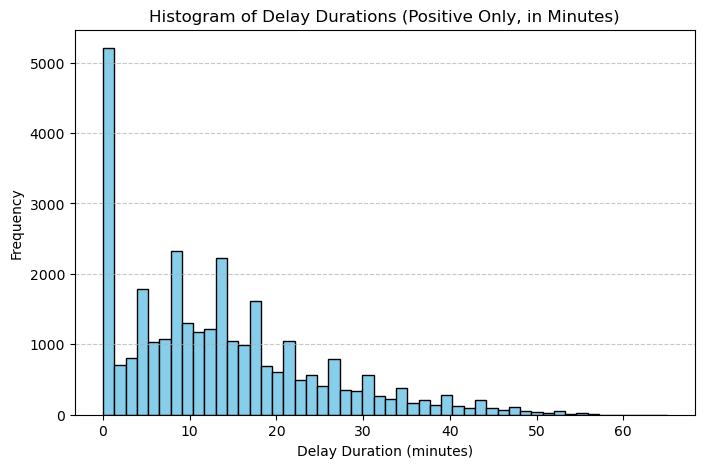

In [38]:


import matplotlib.pyplot as plt
import seaborn as sn

Load the JSON file
file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)


df = pd.json_normalize(flights_data)


df["departure.departureDelayMinutes"] = df["departure.departureDelay"].apply(lambda x: max(x, 0) / 60 if pd.notnull(x) else 0)


plt.figure(figsize=(8, 5))
plt.hist(df["departure.departureDelayMinutes"], bins=50, color="skyblue", edgecolor="black")
plt.title("Histogram of Delay Durations (Positive Only, in Minutes)")
plt.xlabel("Delay Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Temporal Analysis

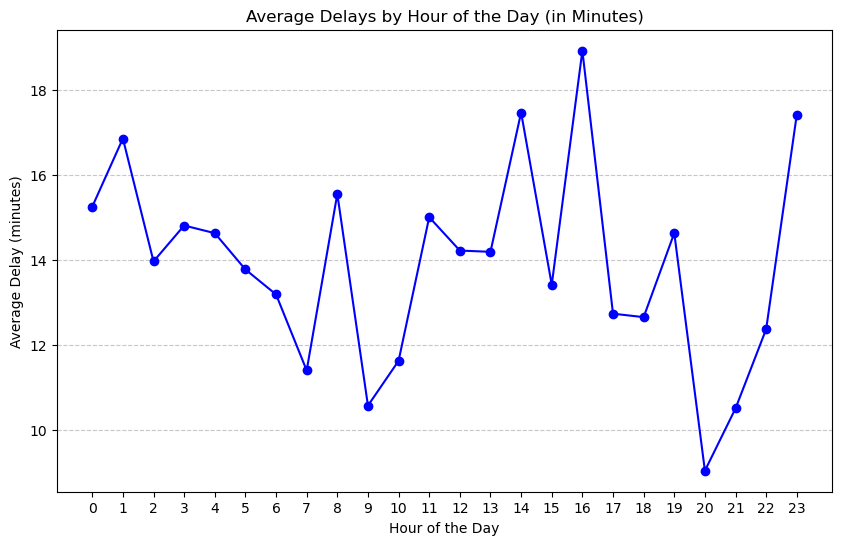

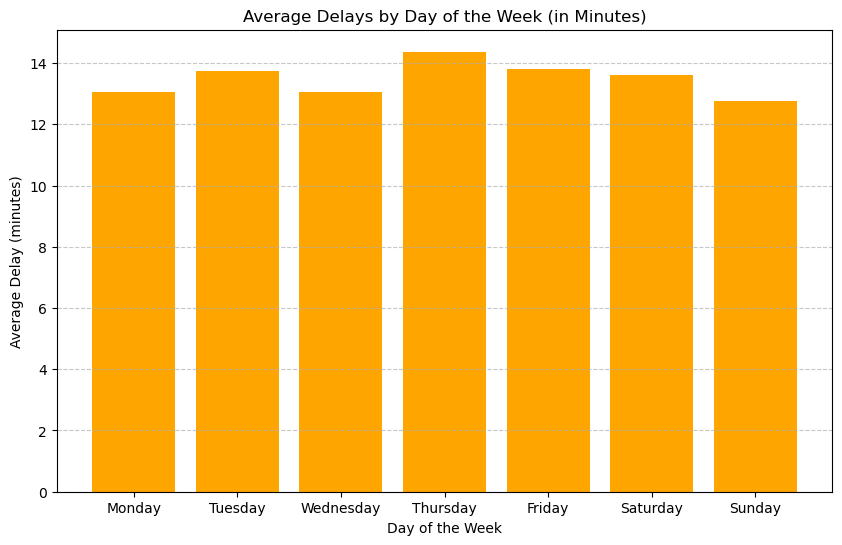

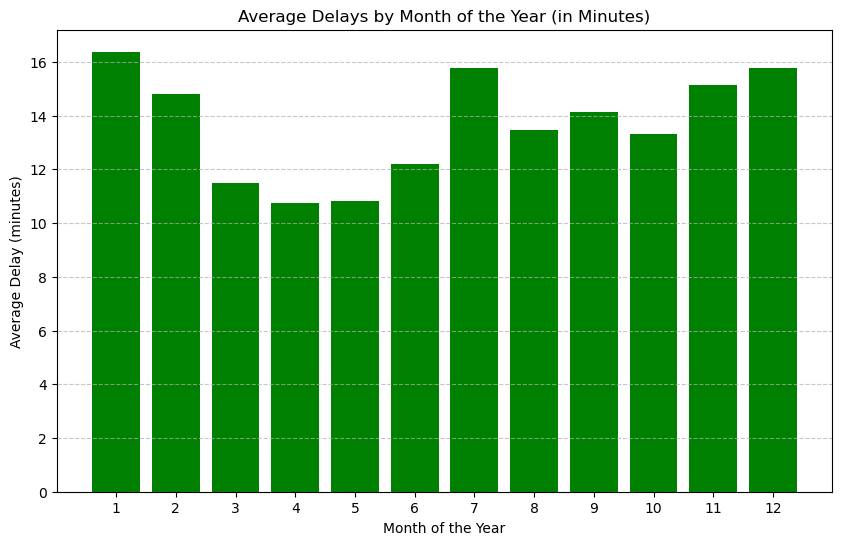

In [39]:
Load the JSON file
file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)

df["departure.departureDelayMinutes"] = df["departure.departureDelay"].apply(lambda x: max(x, 0) / 60 if pd.notnull(x) else 0)


if "departure.scheduledTime_hourOfDay" in df.columns:
    
    hourly_avg_delays = df.groupby("departure.scheduledTime_hourOfDay")["departure.departureDelayMinutes"].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_avg_delays.index, hourly_avg_delays, marker='o', color='blue')
    plt.title("Average Delays by Hour of the Day (in Minutes)")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Delay (minutes)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(range(0, 24))
    plt.show()

if "departure.scheduledTime_dayOfWeek" in df.columns:
    
    daily_avg_delays = df.groupby("departure.scheduledTime_dayOfWeek")["departure.departureDelayMinutes"].mean()
    daily_avg_delays = daily_avg_delays.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.figure(figsize=(10, 6))
    plt.bar(daily_avg_delays.index, daily_avg_delays, color='orange')
    plt.title("Average Delays by Day of the Week (in Minutes)")
    plt.xlabel("Day of the Week")
    plt.ylabel("Average Delay (minutes)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

if "departure.scheduledTime_monthOfYear" in df.columns:
    
    monthly_avg_delays = df.groupby("departure.scheduledTime_monthOfYear")["departure.departureDelayMinutes"].mean()
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_avg_delays.index, monthly_avg_delays, color='green')
    plt.title("Average Delays by Month of the Year (in Minutes)")
    plt.xlabel("Month of the Year")
    plt.ylabel("Average Delay (minutes)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(range(1, 13))
    plt.show()

### Category-Wise Analysis

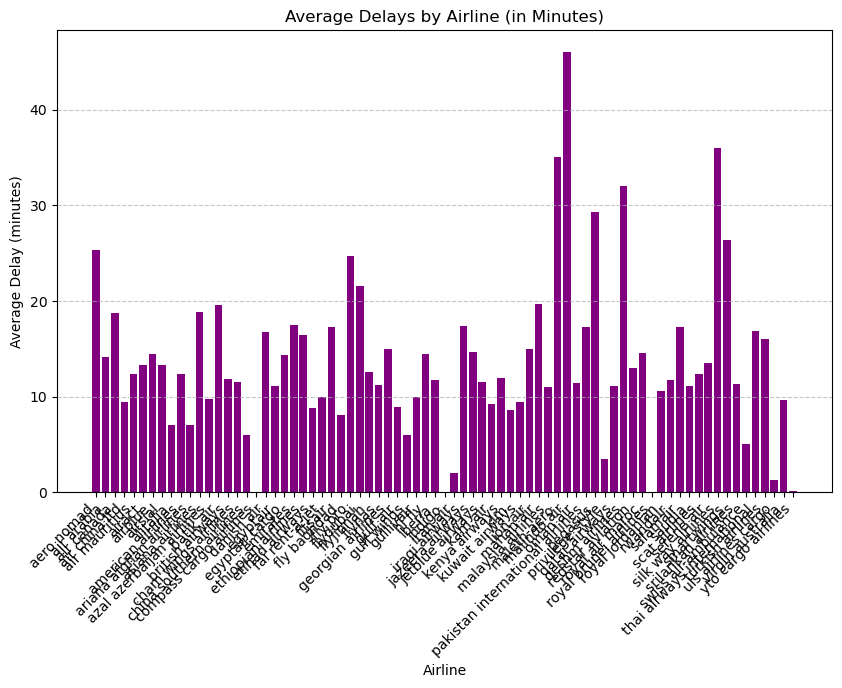

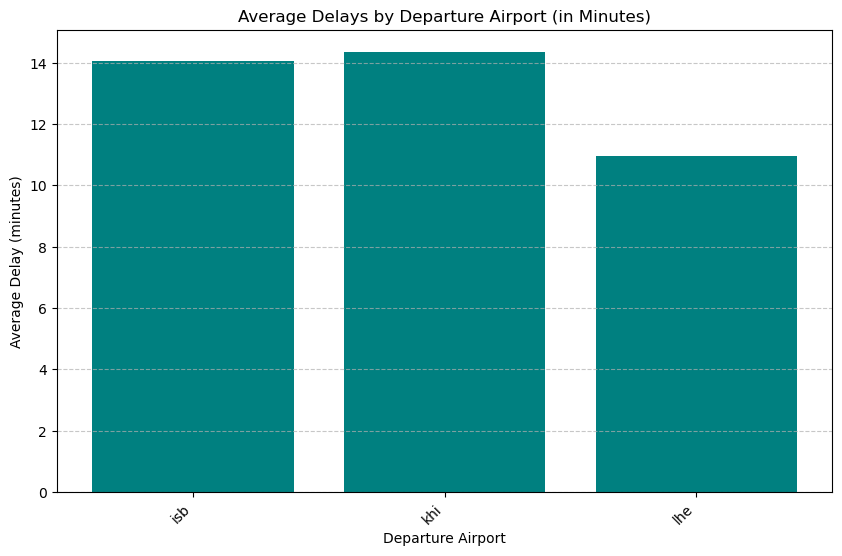

In [41]:

df["departure.departureDelayMinutes"] = df["departure.departureDelay"].apply(lambda x: max(x, 0) / 60 if pd.notnull(x) else 0)

if "airline.name" in df.columns:
    airline_avg_delays = df.groupby("airline.name")["departure.departureDelayMinutes"].mean()
    plt.figure(figsize=(10, 6))
    plt.bar(airline_avg_delays.index, airline_avg_delays, color="purple")
    plt.title("Average Delays by Airline (in Minutes)")
    plt.xlabel("Airline")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


if "departure.iataCode" in df.columns:
    airport_avg_delays = df.groupby("departure.iataCode")["departure.departureDelayMinutes"].mean()
    plt.figure(figsize=(10, 6))
    plt.bar(airport_avg_delays.index, airport_avg_delays, color="teal")
    plt.title("Average Delays by Departure Airport (in Minutes)")
    plt.xlabel("Departure Airport")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()




## Correlation Analysis

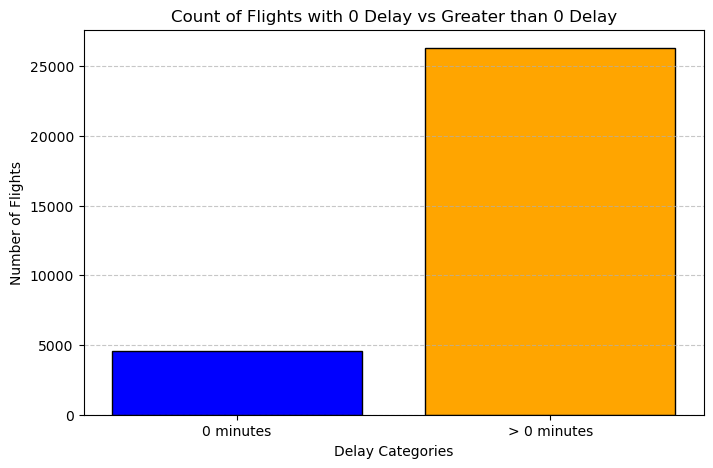

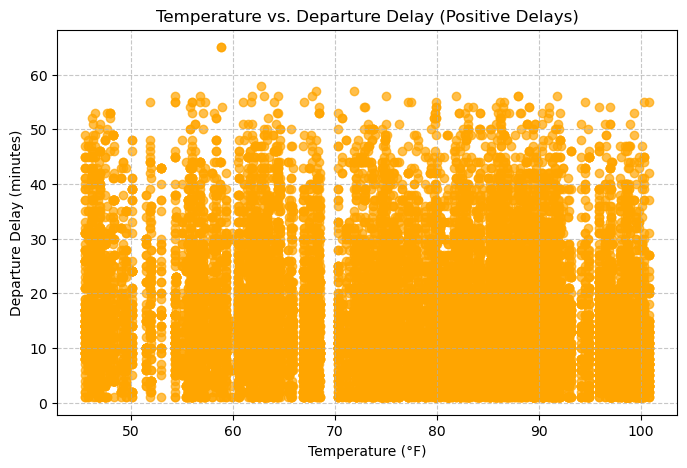

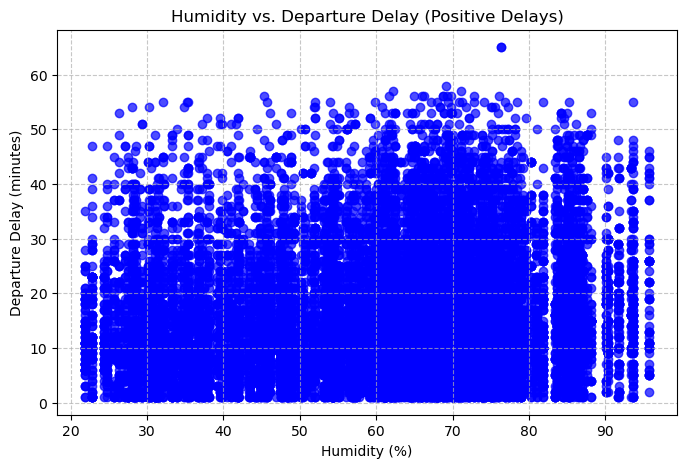

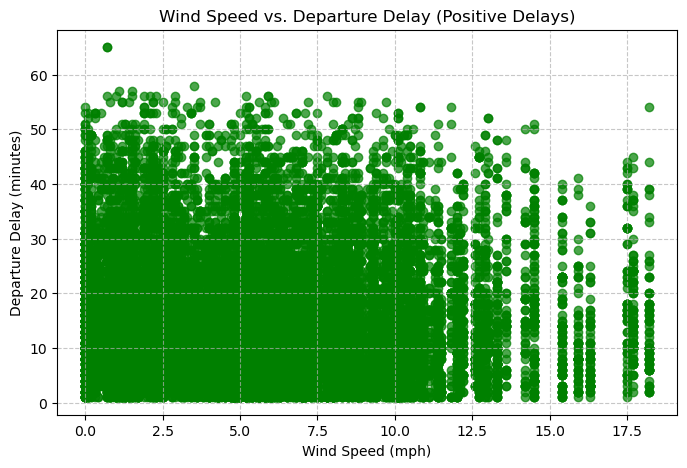

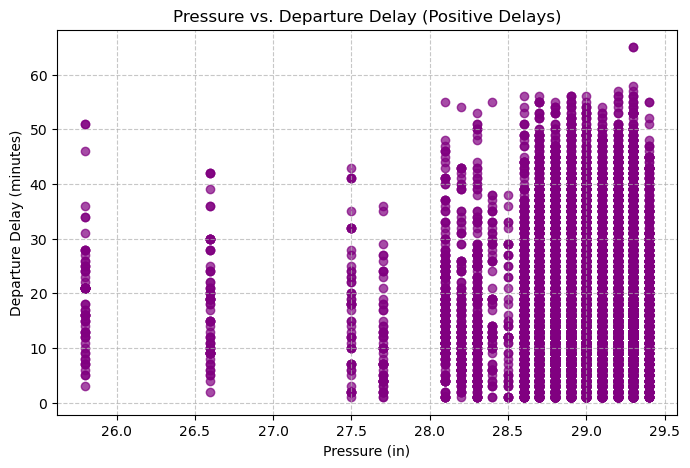

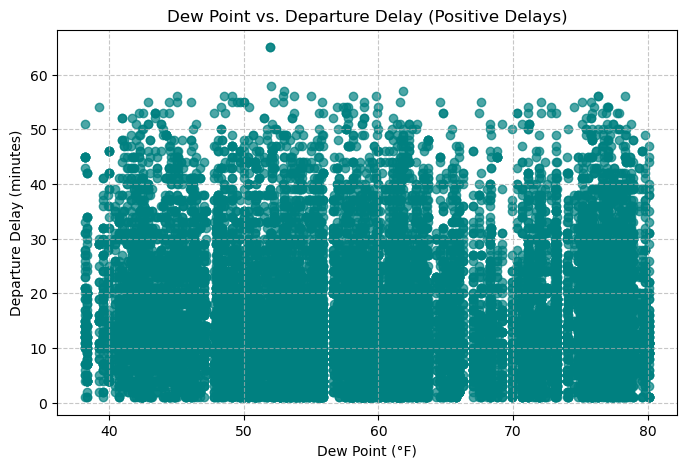

In [49]:

file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)


weather_data = []
for record in flights_data:
    weather_data.append({
        "Temperature (°F)": float(record.get("Temperature (°F)", {}).get("Avg", 0)),
        "Dew Point (°F)": float(record.get("Dew Point (°F)", {}).get("Avg", 0)),
        "Humidity (%)": float(record.get("Humidity (%)", {}).get("Avg", 0)),
        "Wind Speed (mph)": float(record.get("Wind Speed (mph)", {}).get("Avg", 0)),
        "Pressure (in)": float(record.get("Pressure (in)", {}).get("Avg", 0)),
        "Departure Delay (minutes)": max(float(record.get("departure", {}).get("departureDelay", 0)) / 60, 0)  # Treat negative delays as 0
    })

df = pd.DataFrame(weather_data)


df_zero_delay = df[df["Departure Delay (minutes)"] == 0]
df_positive_delay = df[df["Departure Delay (minutes)"] > 0]




plt.figure(figsize=(8, 5))
delay_categories = ["0 minutes", "> 0 minutes"]
delay_counts = [len(df_zero_delay), len(df_positive_delay)]
plt.bar(delay_categories, delay_counts, color=["blue", "orange"], edgecolor="black")
plt.title("Count of Flights with 0 Delay vs Greater than 0 Delay")
plt.ylabel("Number of Flights")
plt.xlabel("Delay Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(df_positive_delay["Temperature (°F)"], df_positive_delay["Departure Delay (minutes)"], color="orange", alpha=0.7)
plt.title("Temperature vs. Departure Delay (Positive Delays)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(df_positive_delay["Humidity (%)"], df_positive_delay["Departure Delay (minutes)"], color="blue", alpha=0.7)
plt.title("Humidity vs. Departure Delay (Positive Delays)")
plt.xlabel("Humidity (%)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(df_positive_delay["Wind Speed (mph)"], df_positive_delay["Departure Delay (minutes)"], color="green", alpha=0.7)
plt.title("Wind Speed vs. Departure Delay (Positive Delays)")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(df_positive_delay["Pressure (in)"], df_positive_delay["Departure Delay (minutes)"], color="purple", alpha=0.7)
plt.title("Pressure vs. Departure Delay (Positive Delays)")
plt.xlabel("Pressure (in)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(df_positive_delay["Dew Point (°F)"], df_positive_delay["Departure Delay (minutes)"], color="teal", alpha=0.7)
plt.title("Dew Point vs. Departure Delay (Positive Delays)")
plt.xlabel("Dew Point (°F)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.7)
plt.show()


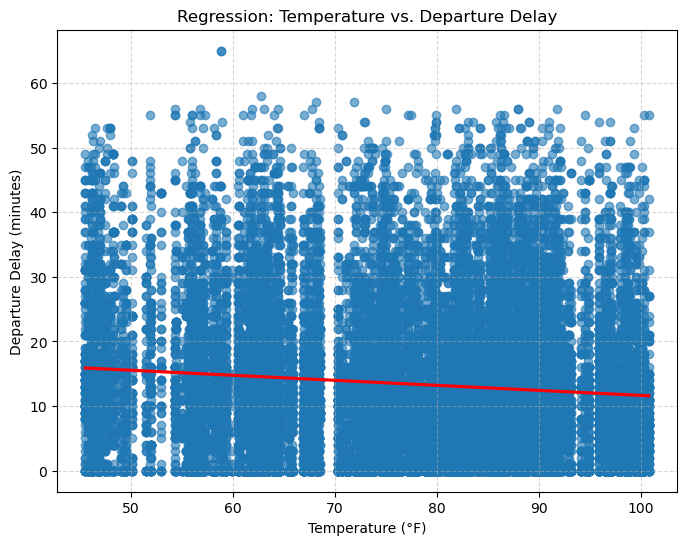

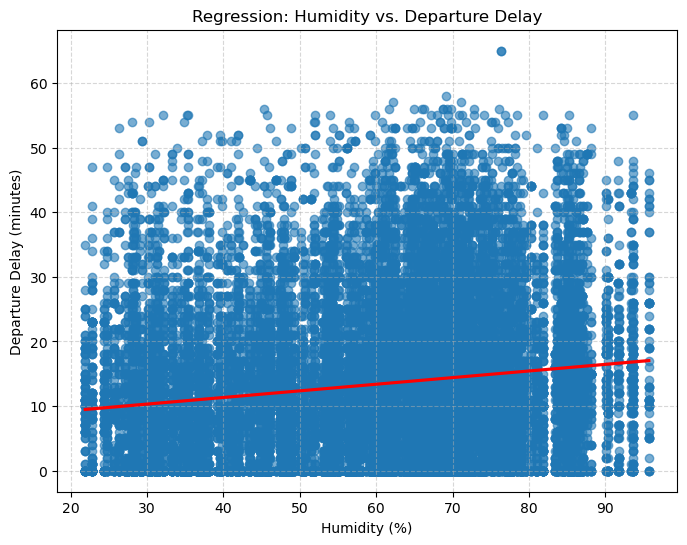

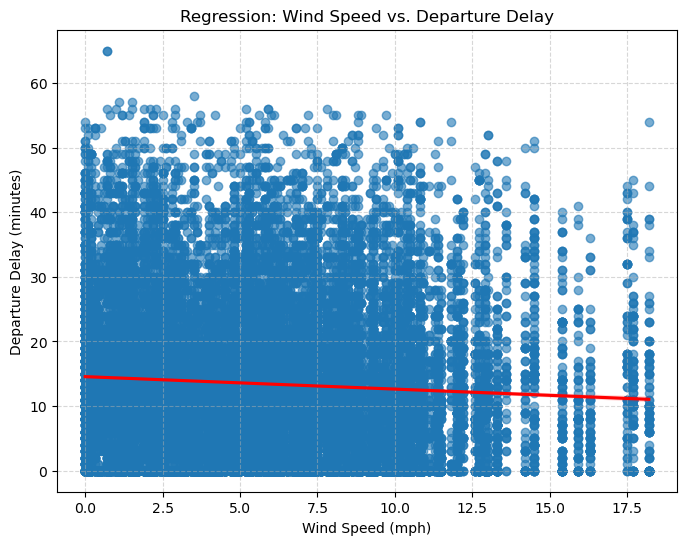

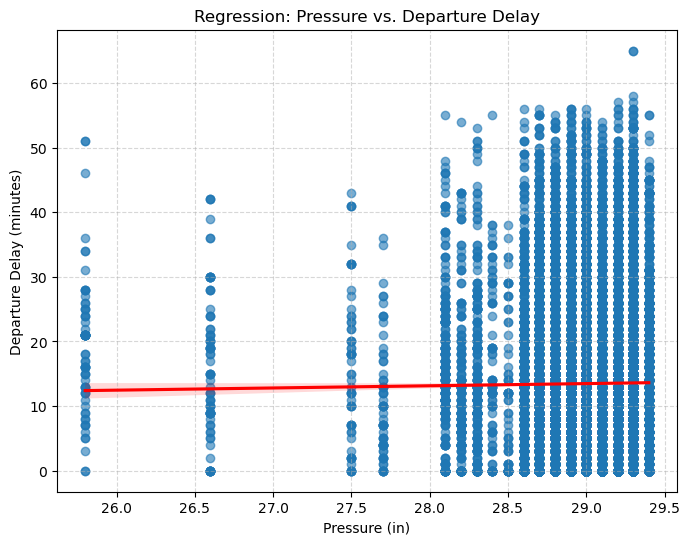

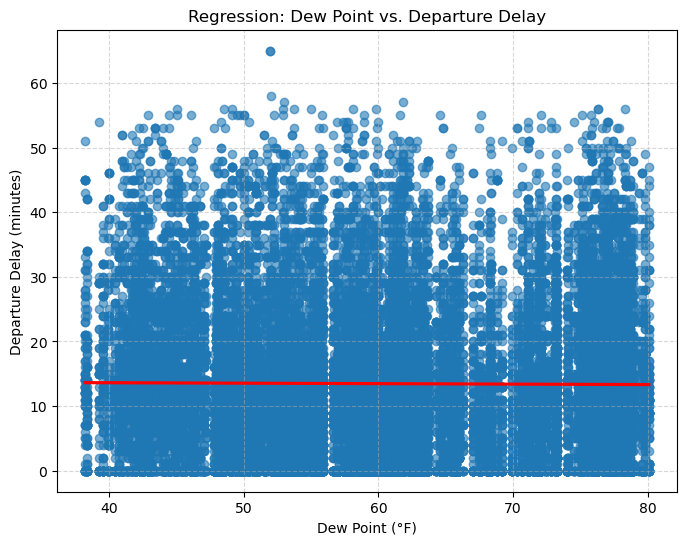

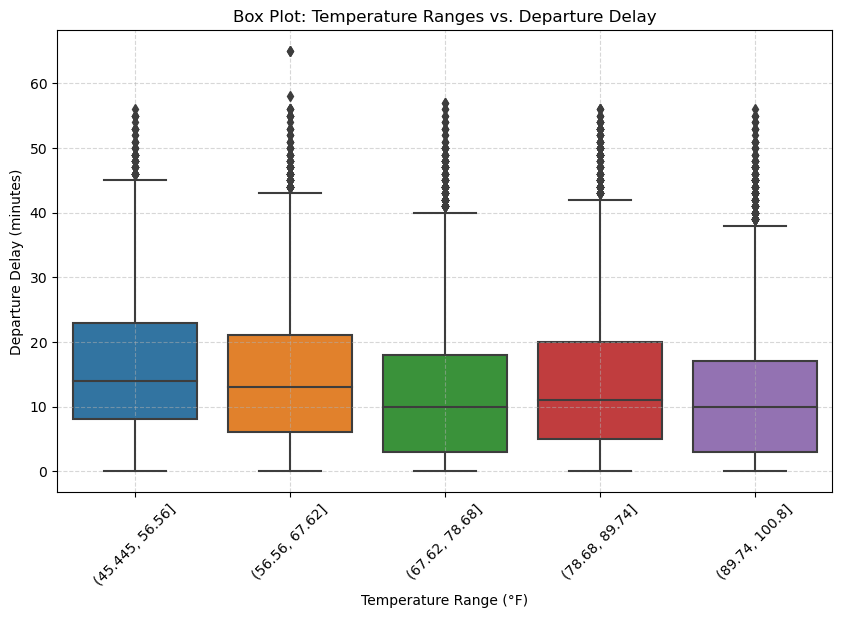

In [50]:

file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)


weather_data = []
for record in flights_data:
    weather_data.append({
        "Temperature (°F)": float(record.get("Temperature (°F)", {}).get("Avg", 0)),
        "Dew Point (°F)": float(record.get("Dew Point (°F)", {}).get("Avg", 0)),
        "Humidity (%)": float(record.get("Humidity (%)", {}).get("Avg", 0)),
        "Wind Speed (mph)": float(record.get("Wind Speed (mph)", {}).get("Avg", 0)),
        "Pressure (in)": float(record.get("Pressure (in)", {}).get("Avg", 0)),
        "Departure Delay (minutes)": max(float(record.get("departure", {}).get("departureDelay", 0)) / 60, 0)  # Treat negative delays as 0
    })

df = pd.DataFrame(weather_data)


plt.figure(figsize=(8, 6))
sns.regplot(x="Temperature (°F)", y="Departure Delay (minutes)", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Regression: Temperature vs. Departure Delay")
plt.xlabel("Temperature (°F)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x="Humidity (%)", y="Departure Delay (minutes)", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Regression: Humidity vs. Departure Delay")
plt.xlabel("Humidity (%)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x="Wind Speed (mph)", y="Departure Delay (minutes)", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Regression: Wind Speed vs. Departure Delay")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x="Pressure (in)", y="Departure Delay (minutes)", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Regression: Pressure vs. Departure Delay")
plt.xlabel("Pressure (in)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x="Dew Point (°F)", y="Departure Delay (minutes)", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Regression: Dew Point vs. Departure Delay")
plt.xlabel("Dew Point (°F)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(linestyle="--", alpha=0.5)
plt.show()




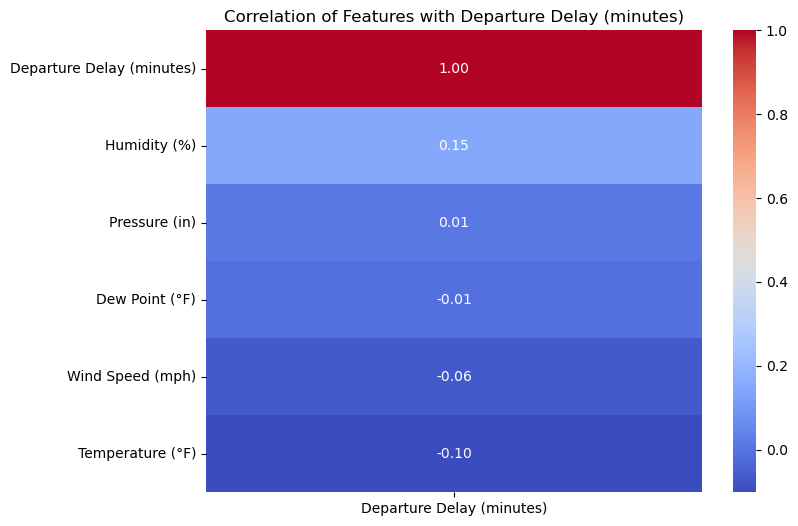

In [52]:


file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)


weather_data = []
for record in flights_data:
    weather_data.append({
        "Temperature (°F)": float(record.get("Temperature (°F)", {}).get("Avg", 0)),
        "Dew Point (°F)": float(record.get("Dew Point (°F)", {}).get("Avg", 0)),
        "Humidity (%)": float(record.get("Humidity (%)", {}).get("Avg", 0)),
        "Wind Speed (mph)": float(record.get("Wind Speed (mph)", {}).get("Avg", 0)),
        "Pressure (in)": float(record.get("Pressure (in)", {}).get("Avg", 0)),
        "Departure Delay (minutes)": max(float(record.get("departure", {}).get("departureDelay", 0)) / 60, 0)  # Treat negative delays as 0
    })

df = pd.DataFrame(weather_data)


correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[["Departure Delay (minutes)"]].sort_values(by="Departure Delay (minutes)", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation of Features with Departure Delay (minutes)")
plt.show()


# Binary Classification

## Random Forest ##

Class distribution before balancing:
1    26308
0     4590
Name: Delayed, dtype: int64
Class distribution after balancing:
1    26308
0    26308
Name: Delayed, dtype: int64
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

     On-Time       0.78      0.90      0.84      7893
     Delayed       0.88      0.74      0.81      7892

    accuracy                           0.82     15785
   macro avg       0.83      0.82      0.82     15785
weighted avg       0.83      0.82      0.82     15785



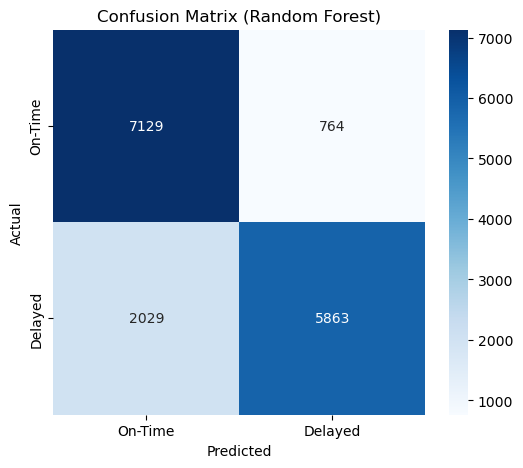

In [88]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)
    
weather_data = []
for record in flights_data:
    departure = record.get("departure", {})
    weather_data.append({
        "Temperature (°F)": float(record.get("Temperature (°F)", {}).get("Avg", 0)),        
        "Humidity (%)": float(record.get("Humidity (%)", {}).get("Avg", 0)),
        "Wind Speed (mph)": float(record.get("Wind Speed (mph)", {}).get("Avg", 0)),        
        "Departure Delay (minutes)": max(departure.get("departureDelay", 0) / 60, 0),  # Treat negative delays as 0
        "Day of Week": departure.get("scheduledTime_dayOfWeek", "Unknown"),
        "Hour of Day": departure.get("scheduledTime_hourOfDay", 0),
        "Month of Year": departure.get("scheduledTime_monthOfYear", 0)
    })

df = pd.DataFrame(weather_data)
df["Temp * Humidity"] = df["Temperature (°F)"] * df["Humidity (%)"]
df = pd.get_dummies(df, columns=["Day of Week"], drop_first=True)
df["Delayed"] = (df["Departure Delay (minutes)"] > 0).astype(int)


print("Class distribution before balancing:")
print(df["Delayed"].value_counts())


majority = df[df["Delayed"] == 1] 
minority = df[df["Delayed"] == 0]  
minority_oversampled = minority.sample(len(majority), replace=True, random_state=42)
balanced_df = pd.concat([majority, minority_oversampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class distribution after balancing:")
print(balanced_df["Delayed"].value_counts())


X = balanced_df.drop(["Departure Delay (minutes)", "Delayed"], axis=1)
y = balanced_df["Delayed"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced",max_depth = 30)
model =RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, y_pred, target_names=["On-Time", "Delayed"])
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## KNN ##

===== KNN Model =====
KNN Accuracy: 0.78
KNN Classification Report:
              precision    recall  f1-score   support

     On-Time       0.74      0.87      0.80      7893
     Delayed       0.84      0.70      0.76      7892

    accuracy                           0.78     15785
   macro avg       0.79      0.78      0.78     15785
weighted avg       0.79      0.78      0.78     15785



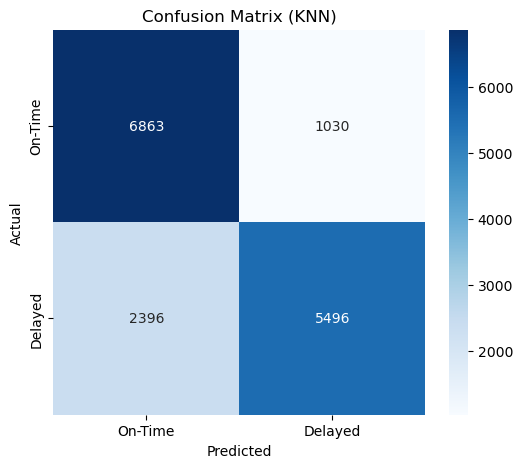

In [10]:


print("===== KNN Model =====")
knn_model = KNeighborsClassifier(n_neighbors=5)  # Use 5 neighbors
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


report_knn = classification_report(y_test, y_pred_knn, target_names=["On-Time", "Delayed"])
print("KNN Classification Report:")
print(report_knn)


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## LOGISTIC REGRESSION ##

===== Logistic Regression Model =====
Logistic Regression Accuracy: 0.58
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     On-Time       0.59      0.54      0.57      7893
     Delayed       0.58      0.62      0.60      7892

    accuracy                           0.58     15785
   macro avg       0.58      0.58      0.58     15785
weighted avg       0.58      0.58      0.58     15785



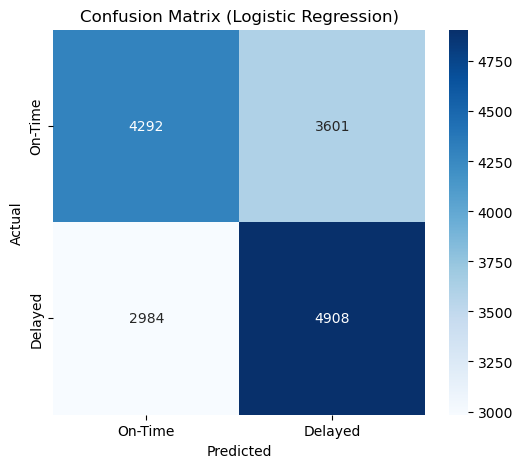

In [8]:
print("===== Logistic Regression Model =====")
logistic_model = LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000)
logistic_model.fit(X_train, y_train)


y_pred_lr = logistic_model.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")


report_lr = classification_report(y_test, y_pred_lr, target_names=["On-Time", "Delayed"])
print("Logistic Regression Classification Report:")
print(report_lr)


conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## GRID SEARCH ##

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

     On-Time       0.78      0.90      0.84      7893
     Delayed       0.88      0.75      0.81      7892

    accuracy                           0.82     15785
   macro avg       0.83      0.82      0.82     15785
weighted avg       0.83      0.82      0.82     15785



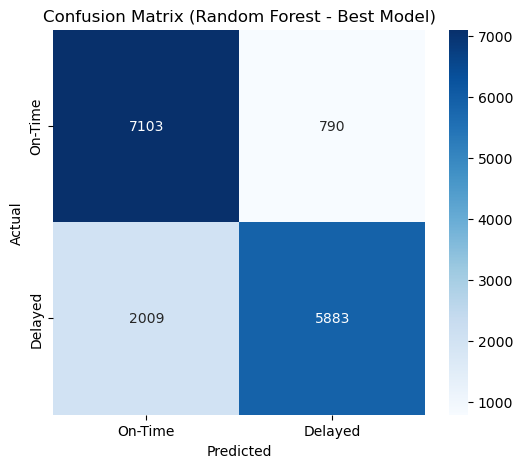

In [12]:

param_grid = {
    'n_estimators': [50, 100, 150],            
    'max_depth': [10, 20, 30, None],          
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'class_weight': ['balanced', 'balanced_subsample']  
}


rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")


y_pred = best_rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, y_pred, target_names=["On-Time", "Delayed"])
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (Random Forest - Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## K-FOLD ACCURACY ##

In [21]:
########### Perform k-Fold Cross-Validation ###########

from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=kf, scoring='accuracy')


print(f"\nk-Fold Cross-Validation Results:")
print(f"Accuracy Scores for each fold: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")




k-Fold Cross-Validation Results:
Accuracy Scores for each fold: [0.86821491 0.86010506 0.85945996 0.86101382 0.86764977]
Mean Accuracy: 0.86


## Multi Classification

Class distribution before balancing:
2    25835
1     4590
0      473
Name: Delay Category Encoded, dtype: int64
Class distribution after balancing:
1    25835
2    25835
0    25835
Name: Delay Category Encoded, dtype: int64
Accuracy from Random Forest (Multi-Class): 0.86
Classification Report:
                precision    recall  f1-score   support

Moderate Delay       0.92      1.00      0.96      7750
      No Delay       0.80      0.86      0.83      7751
   Short Delay       0.88      0.73      0.80      7751

      accuracy                           0.86     23252
     macro avg       0.87      0.86      0.86     23252
  weighted avg       0.87      0.86      0.86     23252



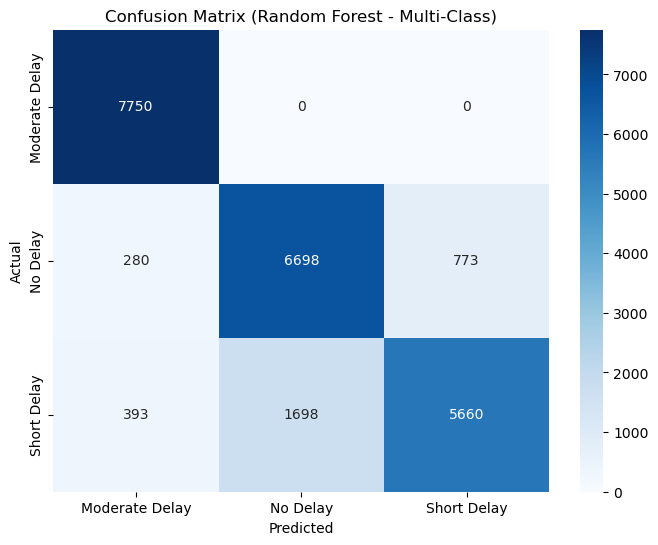

In [87]:
import json
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)


weather_data = []
for record in flights_data:
    departure = record.get("departure", {})
    weather_data.append({
        "Temperature (°F)": float(record.get("Temperature (°F)", {}).get("Avg", 0)),
        "Humidity (%)": float(record.get("Humidity (%)", {}).get("Avg", 0)),
        "Wind Speed (mph)": float(record.get("Wind Speed (mph)", {}).get("Avg", 0)),
        "Departure Delay (minutes)": max(departure.get("departureDelay", 0) / 60, 0),
        "Day of Week": departure.get("scheduledTime_dayOfWeek", "Unknown"),
        "Hour of Day": departure.get("scheduledTime_hourOfDay", 0),
        "Month of Year": departure.get("scheduledTime_monthOfYear", 0)
    })

df = pd.DataFrame(weather_data)


df["Temp * Humidity"] = df["Temperature (°F)"] * df["Humidity (%)"]


df = pd.get_dummies(df, columns=["Day of Week"], drop_first=True)


def categorize_delay(delay):
    if delay == 0:
        return "No Delay"
    elif delay < 45:
        return "Short Delay"
    elif delay <= 175:
        return "Moderate Delay"
    else:
        return "Long Delay"



df["Delay Category"] = df["Departure Delay (minutes)"].apply(categorize_delay)


label_encoder = LabelEncoder()
df["Delay Category Encoded"] = label_encoder.fit_transform(df["Delay Category"])


class_counts = df["Delay Category Encoded"].value_counts()
print("Class distribution before balancing:")
print(class_counts)


classes = df["Delay Category Encoded"].unique()
majority_class_size = max(class_counts)


oversampled_data = []
for cls in classes:
    class_data = df[df["Delay Category Encoded"] == cls]
    oversampled_class_data = class_data.sample(majority_class_size, replace=True, random_state=42)
    oversampled_data.append(oversampled_class_data)


balanced_df = pd.concat(oversampled_data, ignore_index=True)


balanced_class_counts = balanced_df["Delay Category Encoded"].value_counts()
print("Class distribution after balancing:")
print(balanced_class_counts)


X = balanced_df.drop(["Departure Delay (minutes)", "Delay Category", "Delay Category Encoded"], axis=1)
y = balanced_df["Delay Category Encoded"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


rf_model = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced")
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy from Random Forest (Multi-Class): {accuracy:.2f}")


report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Random Forest - Multi-Class)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## LOGISTIC REGRESSION ##

===== Logistic Regression =====
Logistic Regression Accuracy: 0.43

Classification Report (Logistic Regression):
                precision    recall  f1-score   support

Moderate Delay       0.44      0.49      0.46      7750
      No Delay       0.45      0.56      0.50      7751
   Short Delay       0.38      0.25      0.30      7751

      accuracy                           0.43     23252
     macro avg       0.42      0.43      0.42     23252
  weighted avg       0.42      0.43      0.42     23252



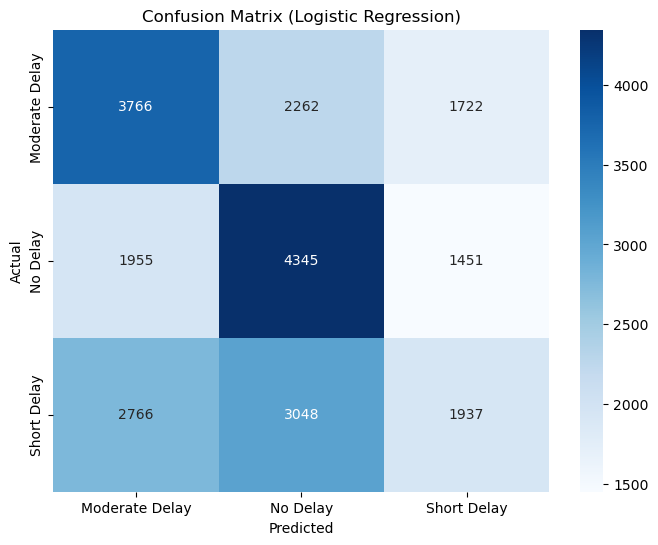

In [18]:
print("===== Logistic Regression =====")
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")
logistic_model.fit(X_train, y_train)

y_pred_lr = logistic_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## KNN ##

===== K-Nearest Neighbors (KNN) =====
KNN Accuracy: 0.84

Classification Report (KNN):
                precision    recall  f1-score   support

Moderate Delay       0.91      0.99      0.95      7750
      No Delay       0.76      0.83      0.79      7751
   Short Delay       0.83      0.68      0.75      7751

      accuracy                           0.84     23252
     macro avg       0.84      0.84      0.83     23252
  weighted avg       0.84      0.84      0.83     23252



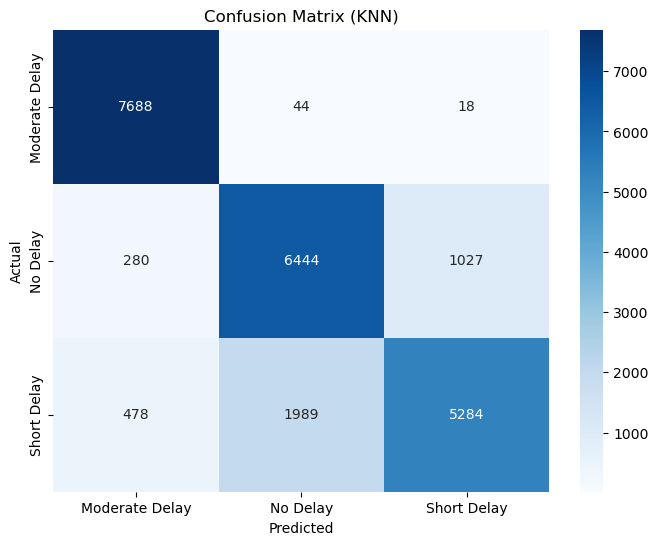

In [19]:
print("===== K-Nearest Neighbors (KNN) =====")
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## GRID SEARCH ##

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy from Tuned Random Forest: 0.86
Classification Report:
                precision    recall  f1-score   support

Moderate Delay       0.92      1.00      0.96      7750
      No Delay       0.80      0.86      0.83      7751
   Short Delay       0.88      0.73      0.80      7751

      accuracy                           0.86     23252
     macro avg       0.87      0.86      0.86     23252
  weighted avg       0.87      0.86      0.86     23252



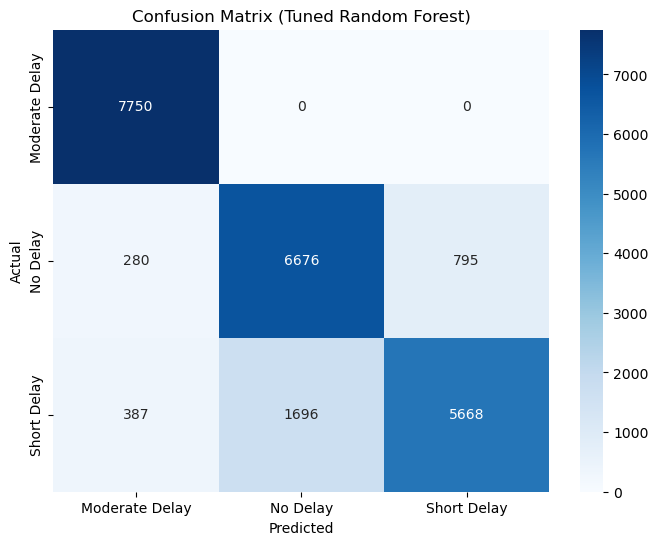

In [20]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced", "balanced_subsample"]
}


rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy from Tuned Random Forest: {accuracy:.2f}")


report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## KNN ##

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=kf, scoring='accuracy')


print(f"\nk-Fold Cross-Validation Results:")
print(f"Accuracy Scores for each fold: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")



k-Fold Cross-Validation Results:
Accuracy Scores for each fold: [0.86821491 0.86010506 0.85945996 0.86101382 0.86764977]
Mean Accuracy: 0.86


# Regression

In [91]:
import json
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


file_path = "flights_with_temporal_features_and_delay_status.json"
with open(file_path, "r") as file:
    flights_data = json.load(file)


weather_data = []
for record in flights_data:
    departure = record.get("departure", {})
    weather_data.append({
        "Temperature (°F)": float(record.get("Temperature (°F)", {}).get("Avg", 0)),
        "Humidity (%)": float(record.get("Humidity (%)", {}).get("Avg", 0)),
        "Wind Speed (mph)": float(record.get("Wind Speed (mph)", {}).get("Avg", 0)),
        "Departure Delay (minutes)": max(departure.get("departureDelay", 0) / 60, 0),   # Exact delay in minutes
        "Day of Week": departure.get("scheduledTime_dayOfWeek", "Unknown"),
        "Hour of Day": departure.get("scheduledTime_hourOfDay", 0),
        "Month of Year": departure.get("scheduledTime_monthOfYear", 0)
    })

df = pd.DataFrame(weather_data)


df = pd.get_dummies(df, columns=["Day of Week"], drop_first=True)
df["Temp * Humidity"] = df["Temperature (°F)"] * df["Humidity (%)"]

df["Delay Range"] = pd.cut(df["Departure Delay (minutes)"], bins=[-0.1, 0, 45, 175, np.inf], labels=["No Delay", "Short", "Moderate", "Long"])


print("Original distribution of delay ranges:")
print(df["Delay Range"].value_counts())


oversampled_data = []
max_count = df["Delay Range"].value_counts().max()

for delay_range in df["Delay Range"].unique():
    class_data = df[df["Delay Range"] == delay_range]
    oversampled_data.append(class_data.sample(max_count, replace=True, random_state=42))


balanced_df = pd.concat(oversampled_data, ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


print("Balanced distribution of delay ranges:")
print(balanced_df["Delay Range"].value_counts())


balanced_df = balanced_df.drop(columns=["Delay Range"])


X = balanced_df.drop(["Departure Delay (minutes)"], axis=1)
y = balanced_df["Departure Delay (minutes)"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


regressor = RandomForestRegressor(random_state=42, n_estimators=100)
regressor.fit(X_train, y_train)


cv_scores_mae = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_rmse = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')


cv_mae = -np.mean(cv_scores_mae)
cv_rmse = -np.mean(cv_scores_rmse)


y_pred = regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Cross-Validation Results:")
print(f"Mean Absolute Error (CV MAE): {cv_mae:.2f}")
print(f"Root Mean Square Error (CV RMSE): {cv_rmse:.2f}")

print("\nTest Set Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")



Original distribution of delay ranges:
Short       25925
No Delay     4590
Moderate      383
Long            0
Name: Delay Range, dtype: int64
Balanced distribution of delay ranges:
No Delay    25925
Short       25925
Moderate    25925
Long            0
Name: Delay Range, dtype: int64
Cross-Validation Results:
Mean Absolute Error (CV MAE): 4.93
Root Mean Square Error (CV RMSE): 8.82

Test Set Results:
Mean Absolute Error (MAE): 4.77
Root Mean Square Error (RMSE): 8.55


## CROSS VALIDATION ##

In [25]:

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


y_pred = linear_regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


cv_scores_mae = -cross_val_score(linear_regressor, X_scaled, y, cv=5, scoring="neg_mean_absolute_error")
cv_scores_rmse = -cross_val_score(linear_regressor, X_scaled, y, cv=5, scoring="neg_root_mean_squared_error")


print("\nCross-Validation Results:")
print(f"Mean Absolute Error (CV MAE): {np.mean(cv_scores_mae):.2f}")
print(f"Root Mean Square Error (CV RMSE): {np.mean(cv_scores_rmse):.2f}")

print("\nTest Set Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")



Cross-Validation Results:
Mean Absolute Error (CV MAE): 18.86
Root Mean Square Error (CV RMSE): 20.84

Test Set Results:
Mean Absolute Error (MAE): 18.86
Root Mean Square Error (RMSE): 20.85


## GRID SEARCH ##

In [26]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring="neg_mean_absolute_error", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_regressor = grid_search.best_estimator_


y_pred = best_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nTest Set Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


cv_scores_mae = -cross_val_score(best_regressor, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
cv_scores_rmse = -cross_val_score(best_regressor, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

print("\nCross-Validation Results:")
print(f"Mean Absolute Error (CV MAE): {np.mean(cv_scores_mae):.2f}")
print(f"Root Mean Square Error (CV RMSE): {np.mean(cv_scores_rmse):.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Test Set Results:
Mean Absolute Error (MAE): 4.77
Root Mean Square Error (RMSE): 8.55

Cross-Validation Results:
Mean Absolute Error (CV MAE): 4.93
Root Mean Square Error (CV RMSE): 8.82


## Preparing Data for predictions 

In [29]:
########### Converting CSV whether data into Json #############

import pandas as pd
import json


file_paths = [f'{i}.xlsx' for i in range(1, 14)]

all_records = []


for file_path in file_paths:
    year = 2023 if int(file_path.split('.')[0]) <= 6 else 2024

 
    excel_data = pd.ExcelFile(file_path)

 
    data = excel_data.parse('Sheet1')


    time_data = data['Time'][0]
    time_parts = time_data.split()

    month = time_parts[0]
    days = time_parts[1:]


    columns_to_split = ['Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)', 
                        'Wind Speed (mph)', 'Pressure (in)']

    records = []


    for i, day in enumerate(days):
        record = {'Year': year, 'Month': month, 'Day': int(day)}

        for col in columns_to_split:
            stats_data = data[col][0].split()  
            labels = stats_data[:3]  
            values = stats_data[3 + (3*i)::1] 

            record[col] = dict(zip(labels, values))

        records.append(record)
    
    all_records.extend(records)


output_file_path = "converted_data.json"
with open(output_file_path, "w") as json_file:
    json.dump(all_records, json_file, indent=4)

print(f"Data has been successfully converted and saved to '{output_file_path}'.")


Data has been successfully converted and saved to 'converted_data.json'.


In [ ]:
########### integrating whether data with given Binary CsSV ###############



with open("converted_data.json", "r") as json_file:
    weather_data = json.load(json_file)


weather_df = pd.DataFrame(weather_data)


month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
weather_df["Month"] = weather_df["Month"].map(month_map)


csv_file_path = "Binary_Test_File.csv"  
flights_df = pd.read_csv(csv_file_path)


flights_df["Scheduled Time"] = pd.to_datetime(flights_df["Scheduled Time"], format="%Y-%m-%dt%H:%M:%S.%f")


flights_df["Year"] = flights_df["Scheduled Time"].dt.year
flights_df["Month"] = flights_df["Scheduled Time"].dt.month  
flights_df["Day"] = flights_df["Scheduled Time"].dt.day
flights_df["Hour"] = flights_df["Scheduled Time"].dt.hour  


merged_df = pd.merge(
    flights_df,
    weather_df[["Year", "Month", "Day", "Temperature (°F)", "Humidity (%)", "Wind Speed (mph)", "Pressure (in)", "Dew Point (°F)"]],
    on=["Year", "Month", "Day"],
    how="left"
)


merged_df["Temperature Avg (°F)"] = merged_df["Temperature (°F)"].apply(lambda x: x.get("Avg") if pd.notnull(x) else None)
merged_df["Humidity Avg (%)"] = merged_df["Humidity (%)"].apply(lambda x: x.get("Avg") if pd.notnull(x) else None)
merged_df["Wind Speed Avg (mph)"] = merged_df["Wind Speed (mph)"].apply(lambda x: x.get("Avg") if pd.notnull(x) else None)
merged_df["Pressure Avg (in)"] = merged_df["Pressure (in)"].apply(lambda x: x.get("Avg") if pd.notnull(x) else None)
merged_df["Dew Point Avg (°F)"] = merged_df["Dew Point (°F)"].apply(lambda x: x.get("Avg") if pd.notnull(x) else None)


merged_df.drop(["Temperature (°F)", "Humidity (%)", "Wind Speed (mph)", "Pressure (in)", "Dew Point (°F)"], axis=1, inplace=True)


output_file_path = "updated_flights_with_weather.csv"
merged_df.to_csv(output_file_path, index=False)

print(f"Updated CSV with weather data has been saved to '{output_file_path}'.")


In [28]:
import pandas as pd

import openpyxl
csv_file_path = "updated_flights_with_weather.csv"
test_data = pd.read_csv(csv_file_path)


required_columns = [
    "Year", "Month", "Day", "Hour", 
    "Temperature Avg (°F)", "Humidity Avg (%)", 
    "Wind Speed Avg (mph)", "Pressure Avg (in)", 
    "Dew Point Avg (°F)"
]
test_data = test_data[required_columns]


test_data.rename(columns={
    "Temperature Avg (°F)": "Temperature (°F)",
    "Humidity Avg (%)": "Humidity (%)",
    "Wind Speed Avg (mph)": "Wind Speed (mph)",
    "Pressure Avg (in)": "Pressure (in)",
    "Dew Point Avg (°F)": "Dew Point (°F)"
}, inplace=True)


test_data["Temp * Humidity"] = test_data["Temperature (°F)"] * test_data["Humidity (%)"]


X_train_columns = [
    "Year", "Month", "Day", "Hour", 
    "Temperature (°F)", "Humidity (%)", 
    "Wind Speed (mph)", "Pressure (in)", 
    "Dew Point (°F)", "Temp * Humidity"
]


test_data = test_data.reindex(columns=X_train_columns, fill_value=0)


In [76]:
import pandas as pd


flights_df = pd.DataFrame(test_data)
day_dummies = pd.get_dummies(flights_df["Day"], prefix="Day of Week")
flights_df = pd.concat([flights_df, day_dummies], axis=1)
output_file_path = 'updated_flights_with_day_of_week.csv'
flights_df.to_csv(output_file_path, index=False)

output_file_path


'updated_flights_with_day_of_week.csv'

In [92]:

test_data_path = "Testing_data.csv"
test_data = pd.read_csv(test_data_path)


test_data.rename(columns={
    "Month": "Month of Year",
    "Day": "Day",
    "Hour": "Hour of Day",
    "Temperature (Â°F)": "Temperature (°F)",  
    "Temp * Humidity": "Temp * Humidity",
    "Day of Week_Friday": "Day of Week_Friday",
    "Day of Week_Monday": "Day of Week_Monday",
    "Day of Week_Saturday": "Day of Week_Saturday",
    "Day of Week_Sunday": "Day of Week_Sunday",
    "Day of Week_Thursday": "Day of Week_Thursday",
    "Day of Week_Tuesday": "Day of Week_Tuesday",
    "Day of Week_Wednesday": "Day of Week_Wednesday"
}, inplace=True)


required_features = X_train.columns
test_data = test_data[required_features]





In [86]:
predictions = model.predict(test_data)


test_data["Prediction"] = predictions
test_data["Prediction"] = test_data["Prediction"].apply(lambda x: "delayed" if x == 1 else "on-time")


output_file_path = "predictions_on_test_data.csv"
test_data[["Prediction"]].to_csv(output_file_path, index_label="ID")

print(f"Predictions have been saved to '{output_file_path}'.")

Predictions have been saved to 'predictions_on_test_data.csv'.


In [90]:



predictions = rf_model.predict(test_data) 

test_data["Predicted Delay Category"] = label_encoder.inverse_transform(predictions)
output_file_path = "predicted_test_data.csv"
test_data[["Predicted Delay Category"]].to_csv(output_file_path, index_label="ID")

print(f"Predictions have been saved to '{output_file_path}'.")



Predictions have been saved to 'predicted_test_data.csv'.


In [93]:

predictions = regressor.predict(test_data)


test_data["Predicted Departure Delay (minutes)"] = predictions


output_file_path = "predicted_departure_delays.csv"
test_data[["Predicted Departure Delay (minutes)"]].to_csv(output_file_path, index_label="ID")

print(f"Predictions have been saved to '{output_file_path}'.")


Predictions have been saved to 'predicted_departure_delays.csv'.


In [82]:
test_data

,Temperature (°F),Humidity (%),Wind Speed (mph),Hour of Day,Month of Year,Temp * Humidity,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,90.4,33.2,8.0,0,5,3001.28,0,0,0,0,1,0
1,93.0,31.1,4.5,4,5,2892.30,0,0,0,0,1,0
2,91.6,42.5,8.2,3,5,3893.00,0,0,0,1,0,0
3,84.7,54.2,10.5,2,5,4590.74,0,0,1,0,0,0
4,96.6,33.3,3.9,4,5,3216.78,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12909,95.9,40.5,5.5,9,6,3883.95,0,0,1,0,0,0
12910,97.1,44.1,8.6,9,6,4282.11,0,0,0,0,1,0
12911,92.0,50.1,5.9,15,6,4609.20,0,1,0,0,0,0
12912,99.0,41.0,11.4,17,6,4059.00,0,0,0,0,0,1
